# Unsupervised Machine Learning to Improve the Prediction of Myopia
## Author: Robert Franklin
## Date: 4th March 2023

In [1]:
## Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
## Read Data
df = pd.read_csv('Resources/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
## Remove Column
df.drop(columns=['MYOPIC'], inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
## Standardize Data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
## Verify Standardization
print(df_std.describe())

                AGE         SPHEQ            AL           ACD            LT  \
count  6.180000e+02  6.180000e+02  6.180000e+02  6.180000e+02  6.180000e+02   
mean  -5.260086e-16  5.748728e-18  4.070099e-15  2.644415e-16  2.563933e-15   
std    1.000810e+00  1.000810e+00  1.000810e+00  1.000810e+00  1.000810e+00   
min   -1.823978e+00 -2.398435e+00 -3.821093e+00 -3.503927e+00 -3.766030e+00   
25%   -4.202191e-01 -5.512523e-01 -6.721382e-01 -6.716966e-01 -6.830114e-01   
50%   -4.202191e-01 -1.151397e-01 -4.676450e-02  2.767324e-02  3.542691e-03   
75%   -4.202191e-01  3.725391e-01  6.963298e-01  6.575403e-01  6.382821e-01   
max    3.791058e+00  5.709823e+00  3.035973e+00  2.916374e+00  3.695392e+00   

                VCD       SPORTHR        READHR        COMPHR       STUDYHR  \
count  6.180000e+02  6.180000e+02  6.180000e+02  6.180000e+02  6.180000e+02   
mean   5.150860e-15 -2.299491e-17 -2.874364e-17 -3.161800e-17 -8.623091e-18   
std    1.000810e+00  1.000810e+00  1.000810e+00  1.

In [5]:
from sklearn.decomposition import PCA

# Instantiate PCA model
pca = PCA(n_components=0.9)

# Fit the model to the standardized data
pca.fit(df_std)

# Transform the data using the model
df_pca = pca.transform(df_std)

# Print the shape of the original and transformed data
print(f"Original data shape: {df_std.shape}")
print(f"Transformed data shape: {df_pca.shape}")

Original data shape: (618, 14)
Transformed data shape: (618, 10)


### How did the number of the features change using PCA feature reduction?
The original data (df_std) has 618 rows and 14 columns, while the transformed data (df_pca) has 618 rows and 10 columns. This means that performing PCA feature reduction reduced the number of features from 14 to 10, while preserving 90% of the explained variance in the data.

C:\Users\rober\anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


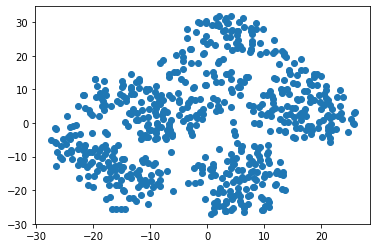

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Instantiate t-SNE model
tsne = TSNE(learning_rate=35)

# Fit the model to the PCA-transformed data
tsne.fit_transform(df_pca)

# Visualize the results
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
plt.show()

### Are there distinct clusters?
Visually their apears to be 4-5 distinct clusters.

C:\Users\rober\anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


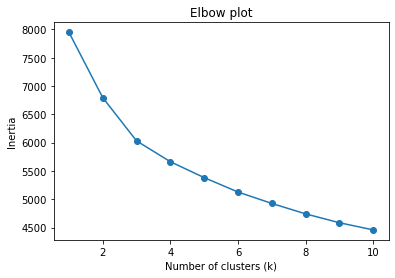

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Instantiate KMeans model for k values 1-10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

### Where the elbow of the plot is, and at which value of k it appears?

The elbow point appears to be around 3 or 4 clusters. Therefore, we might choose 3 or 4 as the optimal number of clusters for this dataset.

### Recommendations

Based on the findings of the unsupervised learning analysis, I would recommend using K-means clustering with 3 clusters to group the patients based on their myopia risk factors. This approach could potentially lead to better predictions of myopia by identifying distinct subgroups of patients with similar risk factors. Additionally, clustering the patients separately may be more effective than training on the whole dataset, as our team previously attempted and failed to do.